In [135]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

In [136]:
df = pd.read_csv('loan_prediction.csv')
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [137]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [138]:
df = df.drop('Loan_ID', axis=1)

In [139]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [140]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [142]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Now Let's fill the missing values. In catagorical columns, we can fill the each columns with the mode of each column. The mode represents the value that appears most often in the column and is an appropriate choice when dealing with catagorical data:

In [143]:
# df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
# df['Married'].fillna(df['Married'].mode()[0], inplace=True)
# df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
# df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

df.fillna({
    'Gender' : df['Gender'].mode()[0],
    'Married' : df['Married'].mode()[0],
    'Dependents' : df['Dependents'].mode()[0],
    'Self_Employed' : df['Self_Employed'].mode()[0]
}, inplace=True)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [145]:
df.isna().sum()

Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

**Now we've the LoanAmount, Loan_Amount_Term and Credit_History, they are the numerical columns. We need to choose the appropriate measures for them:**
1. We can fill in the missing values of the loan amount column with the median value. The median is an appropriate measure to fill in missing values when dealing with skewed distributions or when outliers are present in the data;
2. We can fill in the missing values of the loan amount term column with the mode value of the column. Since the term of the loan amount is a discrete value, the mode is an appropriate metric to use;
3. We can fill in the missing values of the credit history column with the mode value. Since credit history is a binary variable (0 or 1), the mode represents the most common value and is an appropriate choice for filling in missing values.

In [146]:
df.fillna({
    'LoanAmount' : df['LoanAmount'].median(),
    'Loan_Amount_Term' : df['Loan_Amount_Term'].mode()[0],
    'Credit_History' : df['Credit_History'].mode()[0]
}, inplace=True)

In [147]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [148]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# EDA
Now let's see the data.

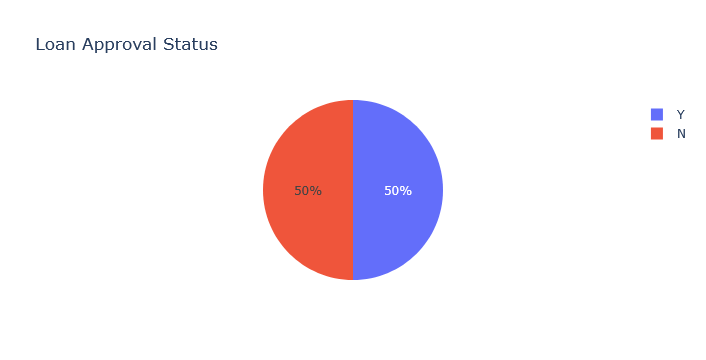

In [149]:
import plotly.express as px

loan_status_count = df['Loan_Status'].value_counts()
fig_loan_status = px.pie(
    loan_status_count,
    names=loan_status_count.index,
    title='Loan Approval Status'
)
fig_loan_status.show()

gender column:

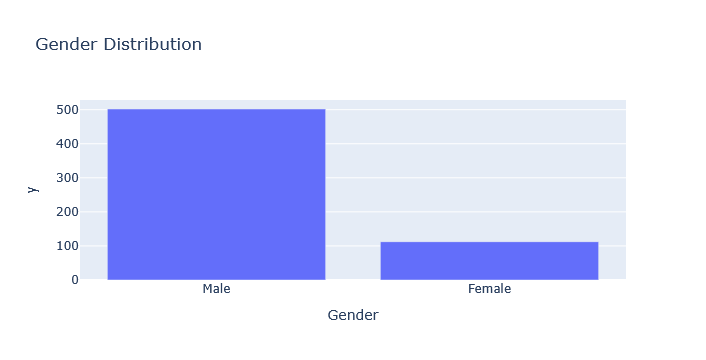

In [150]:
gender_count = df['Gender'].value_counts()
fig_gender = px.bar(gender_count,
                    x=gender_count.index,
                    y=gender_count.values,
                    title='Gender Distribution')
fig_gender.show()

marital status column

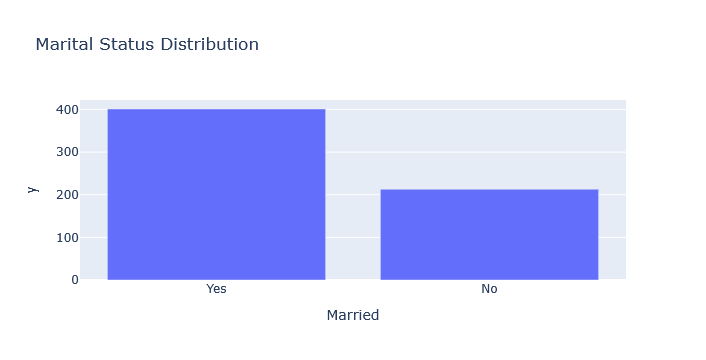

In [151]:
marital_count = df['Married'].value_counts()
fig_married = px.bar(marital_count,
                     x=marital_count.index,
                     y=marital_count.values,
                     title='Marital Status Distribution')
fig_married.show()

Education Column

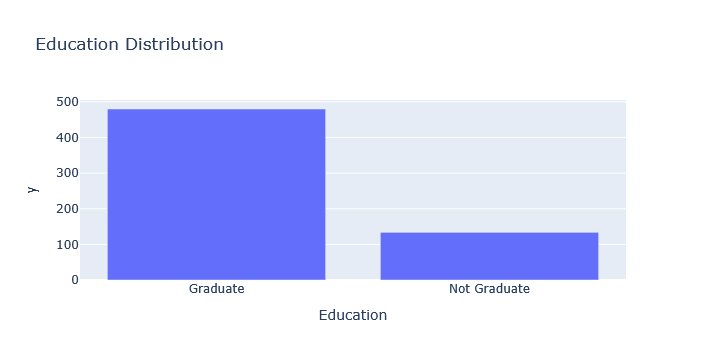

In [152]:
education_count = df['Education'].value_counts()
fig_education = px.bar(education_count,
                       x=education_count.index,
                       y=education_count.values,
                       title='Education Distribution')
fig_education.show()

self-employment column

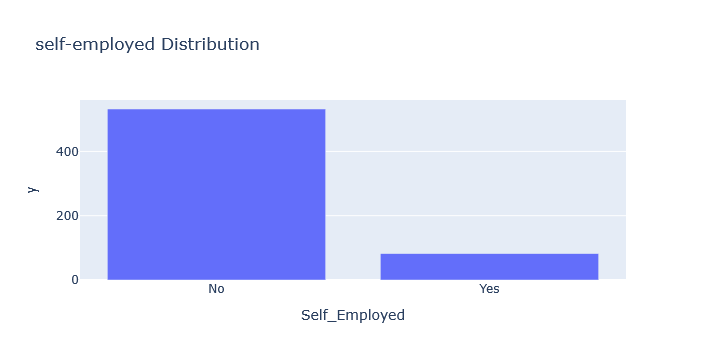

In [153]:
self_employed_count = df['Self_Employed'].value_counts()
fig_self_employed = px.bar(self_employed_count,
                           x=self_employed_count.index,
                           y=self_employed_count.values,
                           title='self-employed Distribution')
fig_self_employed.show()

Applicant Income

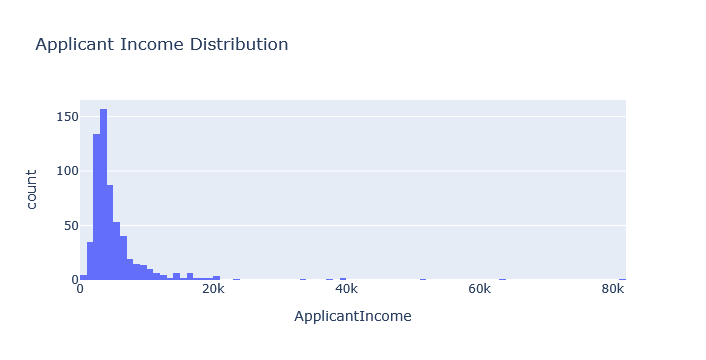

In [154]:
fig_applicant_income = px.histogram(df, x='ApplicantIncome',
                                    title='Applicant Income Distribution')
fig_applicant_income.show()

## Loan status vs ApplicantIncome: 

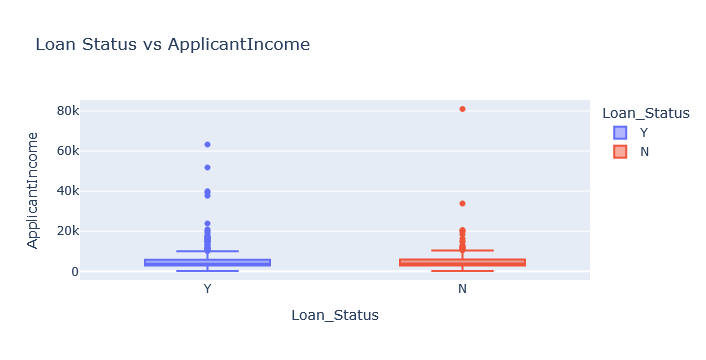

In [155]:
fig_income = px.box(df, x='Loan_Status',
                    y='ApplicantIncome',
                    color='Loan_Status',
                    title='Loan Status vs ApplicantIncome')
fig_income.show()

**The column ApplicantIncome has outliers (values that are way too high or too low compared to most of the data). Outliers can mess up analysis and models.**

Solution: Use IQR method (Interquartile Range).

Steps:

Q1 & Q3

Q1 = 25th percentile (value below which 25% of data falls).
Q3 = 75th percentile (value below which 75% of data falls).


IQR = Q3 - Q1 → this measures the "spread" of the middle 50% of data.

Bounds:

Lower bound = Q1 - 1.5 * IQR
Upper bound = Q3 + 1.5 * IQR 

`👉 Anything outside these bounds is considered an outlier.`

💡 Example:
If most people earn between 2k–6k, but one guy has 500k salary, that’s an outlier. The IQR method automatically finds that 500k is outside the normal range → removes it.

In [156]:
# Calculate the IQR
Q1 = df['ApplicantIncome'].quantile(0.25)
Q2 = df['ApplicantIncome'].quantile(0.75)
IQR = Q2-Q1

# Define the lower and upper bounds for outlires
lower_bound = Q1 - 1.5*IQR
upper_bound = Q2 + 1.5*IQR

# Remove Outlires
df = df[(df['ApplicantIncome'] >= lower_bound) & (df['ApplicantIncome'] <= upper_bound)]

## Loan_Status vs CoapplicantIncome:

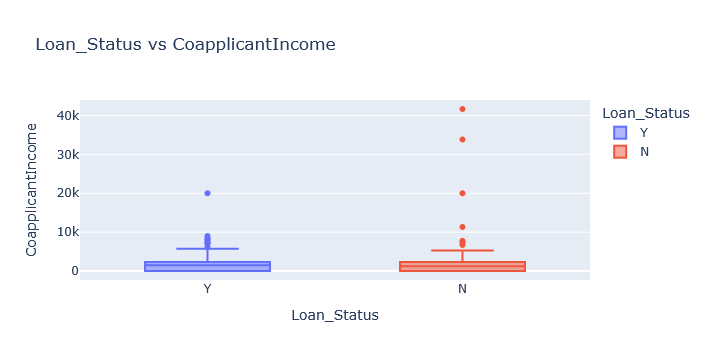

In [157]:
fig_coapplicant_income = px.box(df,
                                x='Loan_Status',
                                y='CoapplicantIncome',
                                color='Loan_Status',
                                title='Loan_Status vs CoapplicantIncome')
fig_coapplicant_income.show()

In [158]:
# Calculate the IQR
Q1 = df['CoapplicantIncome'].quantile(0.25)
Q3 = df['CoapplicantIncome'].quantile(0.75)
IQR = Q3 - Q1

# Define the Lower and upper bounds of the outlires
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 

# remove outlires
df = df[(df['CoapplicantIncome'] >= lower_bound) & (df['CoapplicantIncome'] <= upper_bound)]

## Loan Status vs LoanAmount

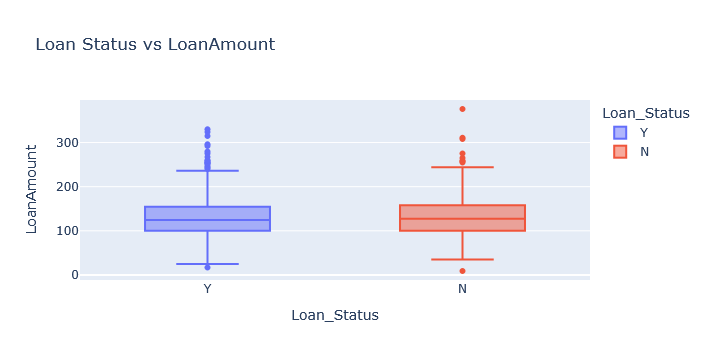

In [159]:
fig_loan_amount = px.box(df,
                         x='Loan_Status',
                         y='LoanAmount',
                         color='Loan_Status',
                         title='Loan Status vs LoanAmount')
fig_loan_amount.show()

## Loan_status vs Credit_History

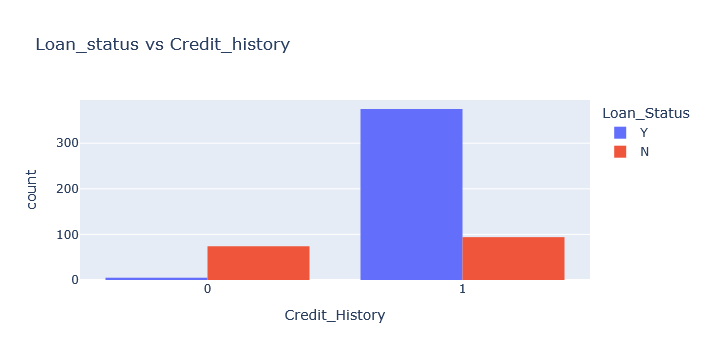

In [160]:
fig_credit_history = px.histogram(df,
                                  x='Credit_History',
                                  color='Loan_Status',
                                  barmode='group',
                                  title='Loan_status vs Credit_history')
fig_credit_history.show()

## Loan_status vs Property_Area

In [161]:
fig_property_area = px.histogram(df,
                                 x='Property_Area',
                                 color='Loan_Status',
                                 barmode='group',
                                 title='Loan_status vs Property_Area')
fig_property_area.show()

# **Data Preperation and Training Loan Approval Prediction Model**

In [162]:
# convert catagorical columns into numerical using OneHotEncoder
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
df = pd.get_dummies(df, columns=cat_cols)

# Split the dataset into X and Y
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#
scaler = StandardScaler()
numeerical_cols = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
X_train[numeerical_cols] = scaler.fit_transform(X_train[numeerical_cols])
X_test[numeerical_cols] = scaler.fit_transform(X_test[numeerical_cols])

from sklearn.svm import SVC
model = SVC(random_state=42)
model.fit(X_train, y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# Now makee predictions on the test set

In [168]:
y_preds = model.predict(X_test)
print(y_preds)

['Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y' 'Y'
 'Y' 'Y' 'Y' 'N' 'Y' 'N' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'Y'
 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N' 'Y' 'Y'
 'Y' 'Y']


In [170]:
# convert X_test to a DataFrame
X_test_df = pd.DataFrame(X_test, columns=X_test.columns)

X_test_df['Loan_Status_predicted'] = y_preds
X_test_df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_predicted
277,-0.520221,-0.052125,-0.967881,0.014215,0.442326,False,True,False,True,True,...,False,False,True,False,True,False,False,False,True,Y
84,-0.097903,-0.939288,-1.530701,-3.113045,0.442326,False,True,False,True,False,...,False,False,True,False,True,False,False,False,True,Y
275,-0.688670,0.317753,-0.311257,0.014215,0.442326,False,True,False,True,False,...,False,False,True,False,True,False,False,True,False,Y
392,-0.768362,0.504057,-0.217453,0.014215,0.442326,False,True,False,True,True,...,False,False,True,False,True,False,False,False,True,Y
537,-0.274942,-0.939288,-0.461342,0.014215,0.442326,False,True,True,False,False,...,True,False,True,False,True,False,False,True,False,Y
